# The following questions are what I'm trying to answer

### Where are the majority of sales come from Region, Category and Segment ?
### What are the Essential products in my store?
### When Each product is mostly demanded in order to have sufficient amount by this time?
### The average of sales daily, weekly, monthly, and quartarly
### What kind of products that are most soled in each region?
### Is Ship Mode related to sale price or customer segment or Region?
### Are the Orders increasing over time?
### What is the prefered ship mode?

#### Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### Loading data

In [2]:
data = pd.read_csv("/kaggle/input/sales-forecasting/train.csv", sep=",", encoding="utf-8")
df = pd.DataFrame(data)

### What is the distribution of the dataset looks like?

<Axes: xlabel='Sales'>

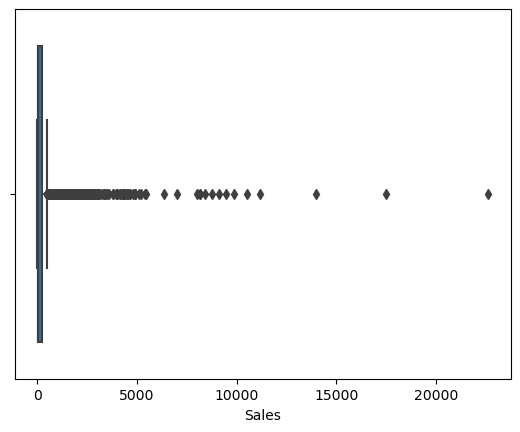

In [3]:
sns.boxplot(x=df["Sales"])

### As we can see, the majority of sales are coming from low cost products
### let's focuse on the sales less than 1000

<Axes: xlabel='Sales'>

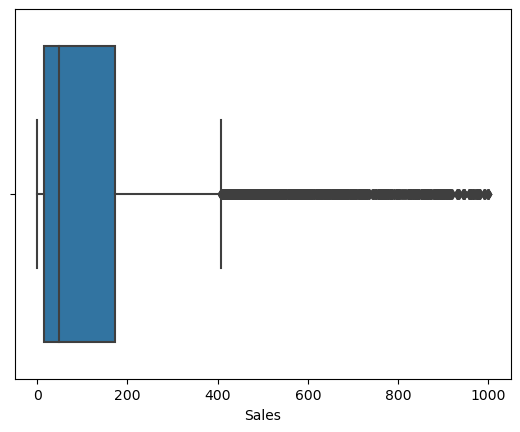

In [4]:
majority_of_sales = df[df["Sales"] <= 1000]
sns.boxplot(x=majority_of_sales["Sales"])

### This show that large number of my sale come from products that range from 0 to 200
### I will categorize my data into ranges <br> [0, 1000] which represent <u>small sales</u> <br>]1000, 5000] which represent <u>medium sales</u> <br>sales > 5000 which represent <u>big sales</u> 

In [5]:
big_sales = df[(df["Sales"] > 1000) & (df["Sales"] <= 5000)]
bins = [0, 1000, 5000, np.inf]
labels = ['small sales', 'medium sales', 'big sales']
sales_groups = pd.cut(df.Sales, bins, labels=labels)
df['sale_group'] = sales_groups
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,sale_group
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,small sales
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,small sales
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,small sales
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,small sales
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,small sales
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,small sales
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,small sales
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,small sales
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,small sales


## How much money I'm making from the majority of sales considering each region?

,Region,sale_group,Sales
0,Central,small sales,298489.5236
1,Central,medium sales,143710.8376
2,Central,big sales,50446.5520
3,East,small sales,359355.1010
4,East,medium sales,253363.9510
5,East,big sales,56799.6740
6,South,small sales,210143.3230
7,South,medium sales,133264.7760
8,South,big sales,45743.3600
9,West,small sales,416077.8315


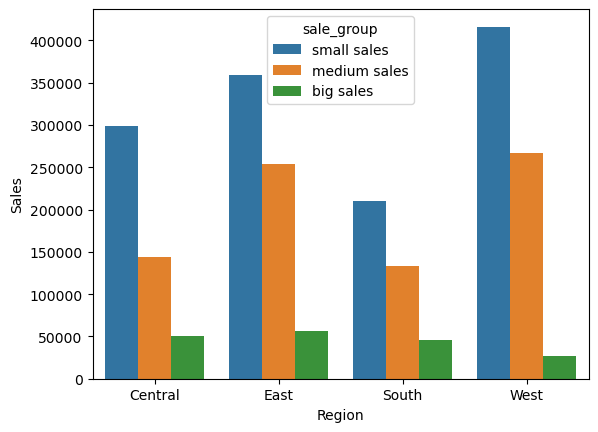

In [6]:
region_sales = pd.DataFrame(df.groupby(["Region", "sale_group"])["Sales"].sum())
region_sales = region_sales.reset_index()
sns.barplot(data=region_sales, x=region_sales['Region'], y=region_sales["Sales"], hue=region_sales["sale_group"])
region_sales
# region_sales = pd.DataFrame(majority_of_sales["Region"].value_counts())
# sns.barplot(data=region_sales, x=region_sales.index, y=region_sales["Region"])
# region_sales


### From the above diagram, we can find that<br><u><i>big sales</i></u> don't have much effect on our income<br><u><i>small sales</i></u> On the other side  are making most of our income<br><u><i>medium sales</i></u> have large effect on our sales, but they are not very popular in South or Central Region

## What are the categories that dominate according the majority of sales?

,Category
Office Supplies,5790
Furniture,1911
Technology,1637


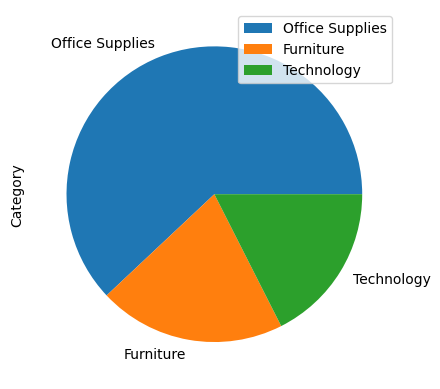

In [7]:
small_sales_category = pd.DataFrame(majority_of_sales["Category"].value_counts())
small_sales_category.plot.pie(y="Category")
small_sales_category

### This show that the majority of sales come from Office Supplies

### What are the categories that dominate on the medium sales?

,Category
Furniture,167
Technology,163
Office Supplies,113


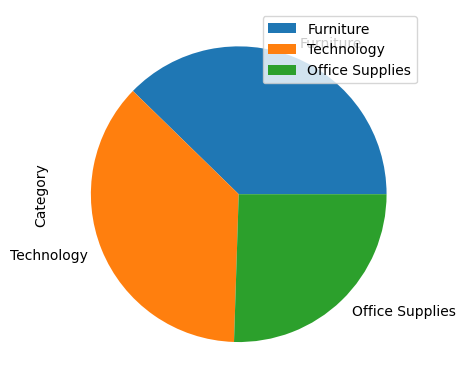

In [8]:
big_sales_category = pd.DataFrame(big_sales["Category"].value_counts())
big_sales_category.plot.pie(y="Category")
big_sales_category

### As shown medium sales mostly comes from technology and furniture

## What are the most demanded sub-categories of the Office Supplies

<Axes: ylabel='Sub-Category'>

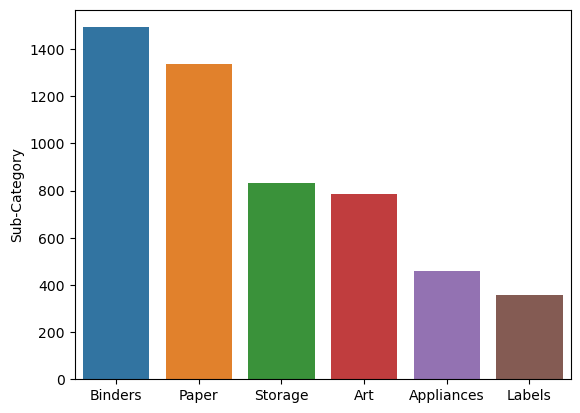

In [9]:
temp  = df.copy()
office = temp[(temp["Category"] == "Office Supplies")]
demanded_sub = pd.DataFrame(office["Sub-Category"].value_counts())[:6]
sns.barplot(demanded_sub, x=demanded_sub.index, y="Sub-Category")

### As we can see the most demanded sub-categories are Binders and Paper

,Segment,Sub-Category,count
0,Consumer,Binders,769
1,Consumer,Paper,676
2,Corporate,Binders,460
3,Corporate,Paper,400
4,Home Office,Binders,263
5,Home Office,Paper,262


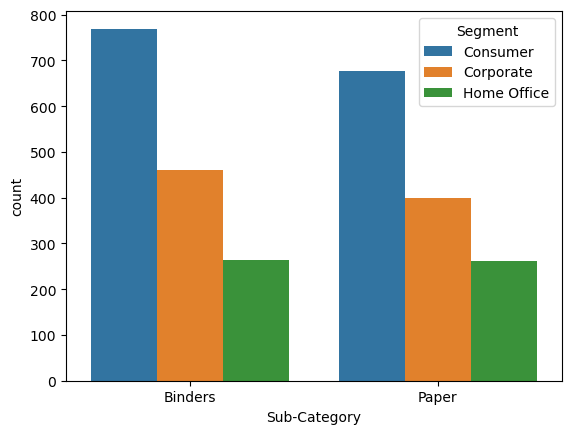

In [10]:
demanded_sub_segment = office[office["Sub-Category"].isin(["Binders", "Paper"])]
demanded_sub_segment = pd.DataFrame(demanded_sub_segment.groupby("Segment")["Sub-Category"].value_counts())
demanded_sub_segment.rename(columns={'Sub-Category': 'count'}, inplace=True)
demanded_sub_segment = demanded_sub_segment.reset_index()
sns.barplot(demanded_sub_segment, x="Sub-Category", y="count", hue="Segment")
demanded_sub_segment

### The most demanded sub-cateogries come from consumer segment

## How much I'm making from each category considering the small and medium sales? 

,Sales
Category,
Furniture,728658.5757
Office Supplies,661009.1240
Technology,691607.9270


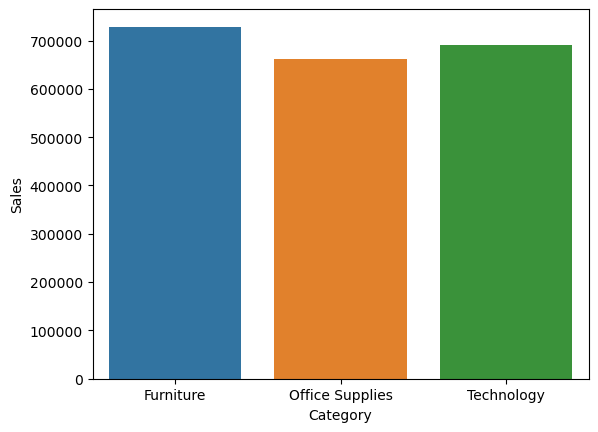

In [11]:
both_sales = df[df["Sales"] <= 5000]
both_sales_category = pd.DataFrame(both_sales.groupby("Category")["Sales"].sum())
sns.barplot(data=both_sales_category, x=both_sales_category.index, y=both_sales_category["Sales"])
both_sales_category

### As we can see, even though Office Supplies sales dominates over the other categories in number of sales, all the categories are almost making the same money

## Do Furniture have the same customer segment distribution?

,Segment,Sub-Category,count
0,Consumer,Furnishings,481
1,Consumer,Chairs,324
2,Consumer,Tables,158
3,Consumer,Bookcases,130
4,Corporate,Furnishings,278
5,Corporate,Chairs,183
6,Corporate,Tables,103
7,Corporate,Bookcases,64
8,Home Office,Furnishings,172
9,Home Office,Chairs,100


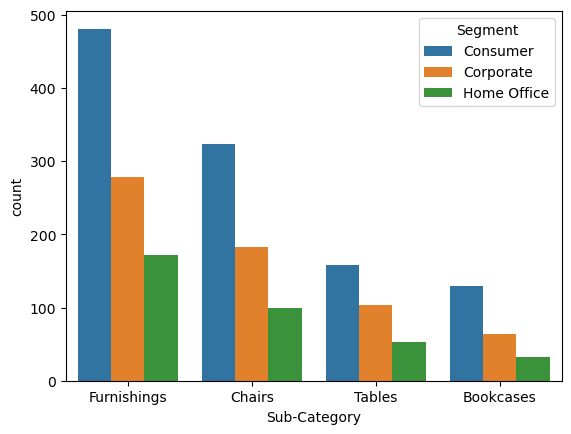

In [12]:
furniture = temp[(temp["Category"] == "Furniture")]
demanded_furniture_sub_segment = pd.DataFrame(furniture.groupby("Segment")["Sub-Category"].value_counts())
demanded_furniture_sub_segment.rename(columns={'Sub-Category': 'count'}, inplace=True)
demanded_furniture_sub_segment = demanded_furniture_sub_segment.reset_index()
sns.barplot(demanded_furniture_sub_segment, x="Sub-Category", y="count", hue="Segment")
demanded_furniture_sub_segment

## Do my customer come again, their rate, segment and the category they come for according to the majority of sales?

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,sale_group,customer_rate
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,small sales,5
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,small sales,5
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,small sales,9
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,small sales,15
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,small sales,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,small sales,24
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,small sales,8
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,small sales,8
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,small sales,8


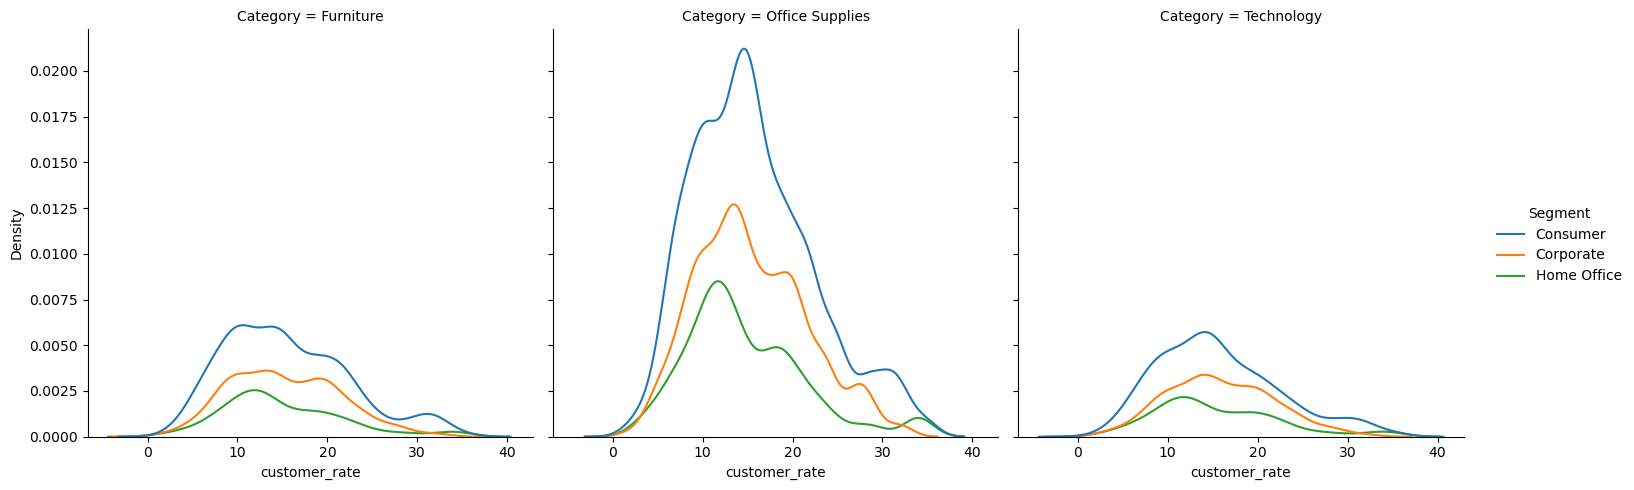

In [13]:
df["customer_rate"] =df.groupby("Customer ID")["Customer ID"].transform('count')
sales = df[df["sale_group"] == "small sales"]
sns.displot(sales, kind="kde", x=sales.customer_rate, hue=sales.Segment, col="Category")
df

### The following diagrams can show us that the large number of <u>frequent customers</u> come for <u>office supplies</u> and are from the <u>Consumer</u> segment

## What is the calse according medium sales?

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


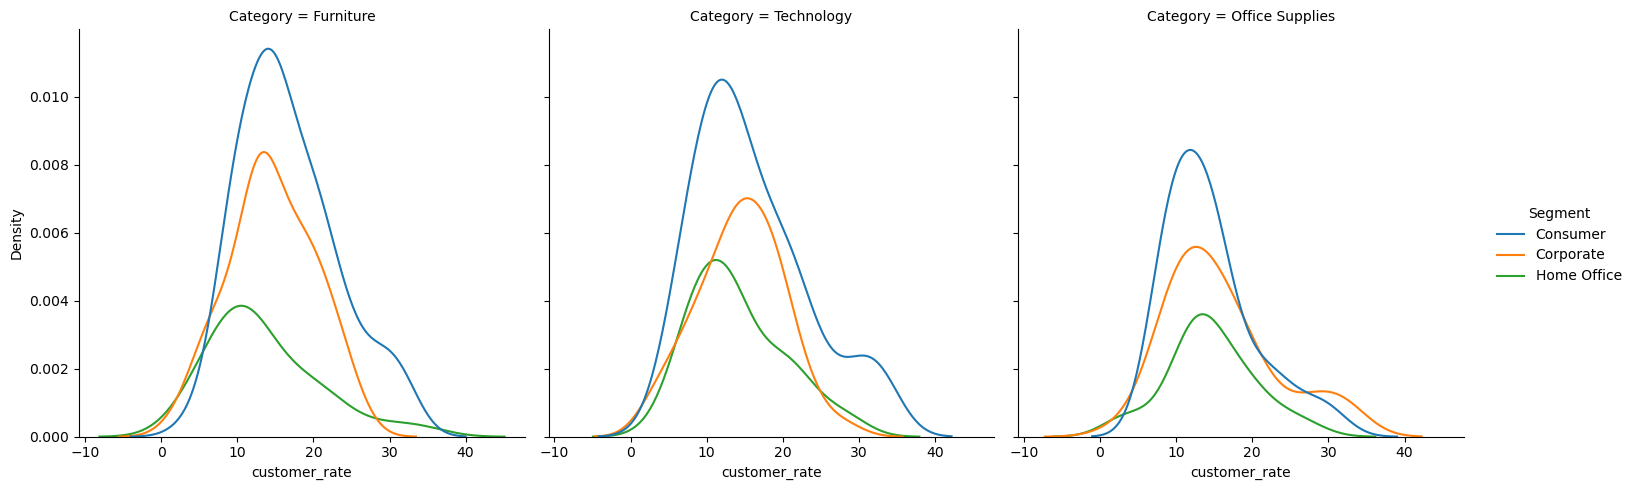

In [14]:
big_sales2 = df[df.sale_group == "medium sales"]
sns.displot(big_sales2, kind="kde", x=big_sales2.customer_rate, hue=big_sales2.Segment, col="Category")

### It looks like that Large number of our frequent customers who comes for office supplies also come to buy technology and furniture making medium sales

## Do we have frequent customers make big sales?

/tmp/ipykernel_20/4199645486.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(outliers2, kind="kde", x=outliers2.customer_rate, hue=outliers2.Segment, col="Category")
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


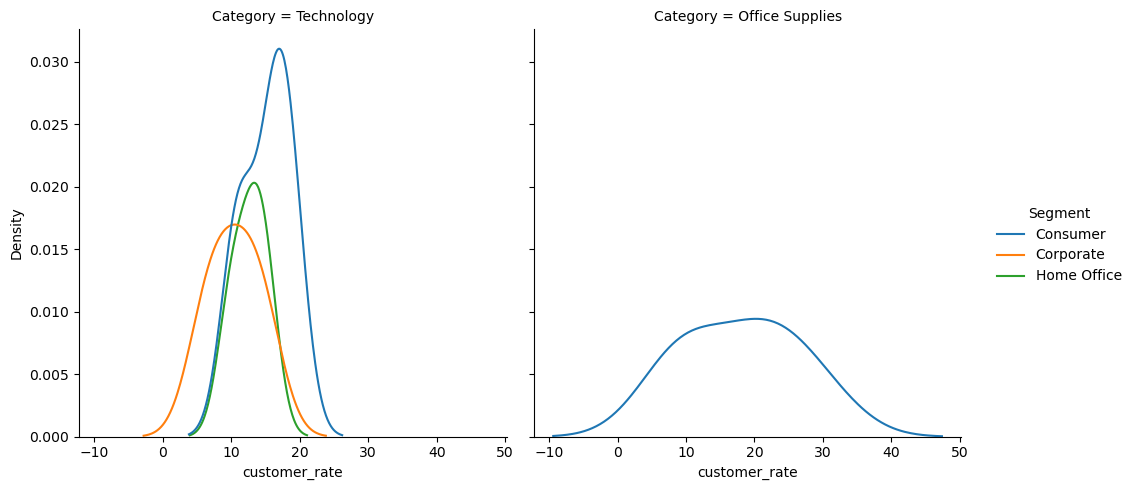

In [15]:
outliers2 = df[df.sale_group == "big sales"]
sns.displot(outliers2, kind="kde", x=outliers2.customer_rate, hue=outliers2.Segment, col="Category")

### As we can see, there are large percentage of big sales come from frequent customers 

## Are the Orders increasing over time?

/tmp/ipykernel_20/66050606.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Order Date"] = pd.to_datetime(df['Order Date'])
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


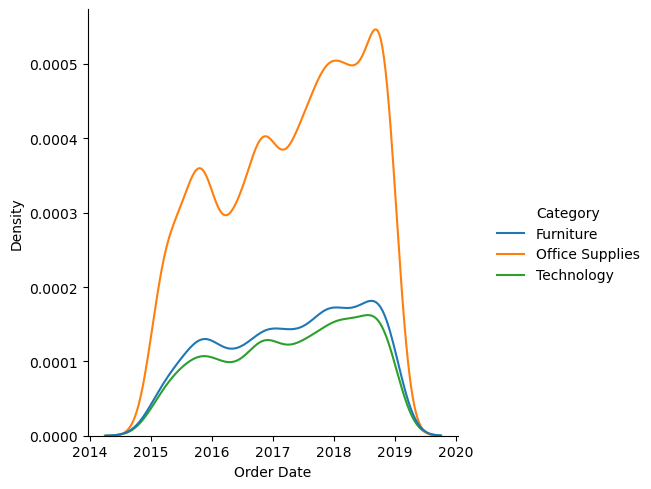

In [16]:
df["Order Date"] = pd.to_datetime(df['Order Date'])
sns.displot(df, kind="kde", x=df["Order Date"], hue="Category")

### As shown Office Supplies demand is increasing very fast, on the other hand technology and furniture increase is slow

In [17]:
df.describe(include=object)

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800
unique,4922,1326,4,793,793,3,1,529,49,4,1861,3,17,1849
top,CA-2018-100111,26/09/2018,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,34,5859,35,35,5101,9800,891,1946,3140,19,5909,1492,47


## Do we have a prefered Ship Mode among specific regions?

<Axes: xlabel='Region', ylabel='count'>

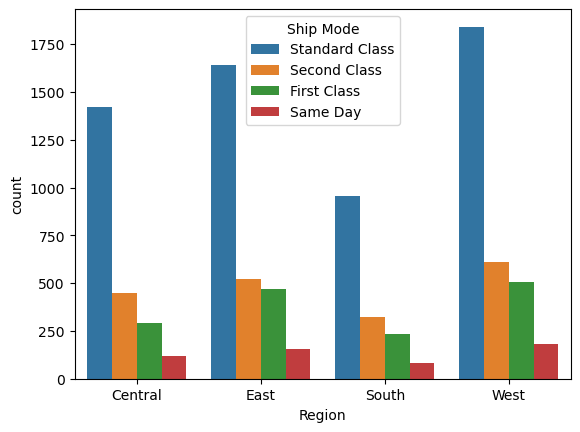

In [18]:
df_copy = df.copy()
ship = pd.DataFrame(df_copy.groupby("Region")["Ship Mode"].value_counts())
ship.rename(columns={"Ship Mode": "count"}, inplace =True)
ship = ship.reset_index()
sns.barplot(ship, x="Region", y="count", hue="Ship Mode")

### The Standard Ship Mode is the most use method among the the four regions 

## Conlusion:

### <font color='green'>The Office Supplies are the most demanded products for sure, these products are used frequently and they attract our customers to buy products with more money from other categories with much more money</font>

### <font color='green'> My sales are low in South, I need to make some commercials at this region</font>

### <font color='green'>Most of my sales and frequent customers comes from consumers segment and I don't have much frequent customers from other segments</font>

### <font color='green'>Our sales are increasing over the years</font>

### <font color='green'>Our Customers are mostly from Consumer Segment</font>

### <font color='green'>The most used shipping mode is the Standard</font>

### <font color='green'></font>